# Assignment 1 – Polynomial Regression using ``torch.nn.Module``

- Please create a copy of this notebook onto your own Drive before working on it: `File-->Save a copy in Drive`
- Please submit your ipynb file named with your initials, e.g. `KJH-Assignment1.ipynb` (or a URL link to it) with **the CODE cells output visible** to support your answers and **TEXTUAL answers given as comments** in the code cells.
- Marks will be deducted for missing or partial code cell output where applicable.
- Deadline for submission is **9:00am, Saturday, March 25th.**

## Neural Network Model for Polynomial Regression
Your task is to build **TWO different neural network models** for the function $y = x^2 + 5x$

Requirements:
- You MUST use `torch.nn.Module` to define your neural network classes.
- A random seed is provided to help with code reproducibility so the code will always produce the same result each time you run it.
- The training data should have **10 input values, $x$, and the correct corresponding output values, $y$,** for the function $y = x^2 + 5x$ 
- Each NN may have **maximum TWO hidden layers**.
- You may use a **maximum of 500 neuron units in each hidden layer**.
- You may train over a **maximum of 1000 epochs**.
- Use suitable activation functions that have been covered in class. 
  - Note: Activation function should be used in every layer and the output layer depending on the type of output.
- You MUST use the **Adam optimiser,** available as **`torch.optim.Adam()`** and the **mean squared error (MSE) loss function**.
- **IMPORTANT:** **Your best 2 models should have a loss lower than 0.01** at the end of training.
- If the loss value is the same, you can fill it out regardless of the rank.
- Please write down **the top 2 models** with the best performance in terms of **lowest loss** from your experiment, including **the number of layers, hidden sizes, learning rate, epochs, and the final loss after running all epochs.**
- Print the loss at every 50th epoch. 
- Test the model on $x=10$.
- **Save your training loss** at every iteration.

Note:
- If your model does not achieve a loss of less than 0.01, you will still be awarded marks for `Q7 – Q10` as long as you can explain your answers accordingly.
- For `Q7 – Q12`, please respond with the cases where the loss is the lowest.

In [1]:
import torch
import torch.nn as nn

# 1. Define training data for a the mathematical formula y = x^2 + 5x (3)
import numpy as np
x_train = np.linspace(-10, 10, 20)
y_train = x_train**2 + x_train*5

x_train = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
print(x_train)
print(y_train)

tensor([[-10.0000],
        [ -8.9474],
        [ -7.8947],
        [ -6.8421],
        [ -5.7895],
        [ -4.7368],
        [ -3.6842],
        [ -2.6316],
        [ -1.5789],
        [ -0.5263],
        [  0.5263],
        [  1.5789],
        [  2.6316],
        [  3.6842],
        [  4.7368],
        [  5.7895],
        [  6.8421],
        [  7.8947],
        [  8.9474],
        [ 10.0000]])
tensor([[ 50.0000],
        [ 35.3186],
        [ 22.8532],
        [ 12.6039],
        [  4.5706],
        [ -1.2465],
        [ -4.8476],
        [ -6.2327],
        [ -5.4017],
        [ -2.3546],
        [  2.9086],
        [ 10.3878],
        [ 20.0831],
        [ 31.9945],
        [ 46.1219],
        [ 62.4654],
        [ 81.0249],
        [101.8006],
        [124.7922],
        [150.0000]])


In [2]:
# Find out the 1st, 2nd lowest loss model
torch.manual_seed(40)
class PolynomialRegression_2_hidden(nn.Module):
    
    # two hidden layers
    def __init__(self, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(1, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x

In [3]:
class PolynomialRegression_1_hidden(nn.Module):
    
    # one hidden layer
    def __init__(self, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(1, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        return x

In [4]:
torch.manual_seed(40)
num_epochs = [100, 300, 500, 700, 900, 1100]
hidden_sizes = [100, 200, 300, 400, 500]

# 1 hidden layer

def PolynomialRegression_loop_1(num_epochs, hidden_size, learning_rate=0.1):
    model = PolynomialRegression_1_hidden(hidden_size)
    loss_fn = nn.MSELoss()
    opt = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        y_pred = model(x_train)
        loss = loss_fn(y_pred, y_train)

        opt.zero_grad()
        loss.backward()
        opt.step()

    print(f'final loss :{loss.item():.5f}, epochs : {num_epochs}, hidden size : {hidden_size}, learning rate : {learning_rate}, hidden layer : 1')
    return loss.item()


temp = np.array([[0,0,0,0]], dtype=np.float32)
for epochs in num_epochs : 
    for size in hidden_sizes :
        row_add = [[epochs, size, PolynomialRegression_loop_1(epochs, size),1]]
        temp = np.r_[temp, row_add]

results_1 = np.delete(temp, 0, axis=0)

# 2 hidden layer

def PolynomialRegression_loop_2(num_epochs, hidden_size, learning_rate=0.1):
    model = PolynomialRegression_2_hidden(hidden_size)

    loss_fn = nn.MSELoss()
    opt = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        y_pred = model(x_train)
        loss = loss_fn(y_pred, y_train)
        opt.zero_grad()
        loss.backward()
        opt.step()
    
    print(f'final loss :{loss.item():.5f}, epochs : {num_epochs}, hidden size : {hidden_size}, learning rate : {learning_rate}, hidden layer : 2')
    return loss.item()

temp = np.array([[0,0,0,0]], dtype=np.float32)
for epochs in num_epochs : 
    for size in hidden_sizes :
        row_add = [[epochs, size, PolynomialRegression_loop_2(epochs, size), 2]]
        temp = np.r_[temp, row_add]

results_2 = np.delete(temp, 0, axis=0)

final loss :7.38780, epochs : 100, hidden size : 100, learning rate : 0.1, hidden layer : 1
final loss :3.35172, epochs : 100, hidden size : 200, learning rate : 0.1, hidden layer : 1
final loss :1.51168, epochs : 100, hidden size : 300, learning rate : 0.1, hidden layer : 1
final loss :1.58870, epochs : 100, hidden size : 400, learning rate : 0.1, hidden layer : 1
final loss :1.60491, epochs : 100, hidden size : 500, learning rate : 0.1, hidden layer : 1
final loss :0.14957, epochs : 300, hidden size : 100, learning rate : 0.1, hidden layer : 1
final loss :0.04223, epochs : 300, hidden size : 200, learning rate : 0.1, hidden layer : 1
final loss :0.04896, epochs : 300, hidden size : 300, learning rate : 0.1, hidden layer : 1
final loss :0.06867, epochs : 300, hidden size : 400, learning rate : 0.1, hidden layer : 1
final loss :0.07489, epochs : 300, hidden size : 500, learning rate : 0.1, hidden layer : 1
final loss :0.03667, epochs : 500, hidden size : 100, learning rate : 0.1, hidde

In [5]:
results = np.concatenate((results_1, results_2), axis=0)
top1_2 = results[results[:,2].argsort()][:2, :]
print(f"<top1> epoch : {top1_2[0,0]}, hidden_size :{top1_2[0,1]}, loss : {top1_2[0,2]:.5f}, hidden layer : {top1_2[0,3]}\n<top2> epoch : {top1_2[1,0]}, hidden_size :{top1_2[1,1]}, loss : {top1_2[1,2]:.5f}, hidden layer : {top1_2[1,3]}")

<top1> epoch : 1100.0, hidden_size :400.0, loss : 0.00002, hidden layer : 2.0
<top2> epoch : 1100.0, hidden_size :500.0, loss : 0.00006, hidden layer : 2.0


In [14]:
# Top 1 Accuracy Model (the model that has the lowest loss)
# <top1> epoch : 1100.0, hidden_size :400.0, loss : 0.00002, hidden layer : 2.0
torch.manual_seed(40) # This is for reproducibility. You need NOT adjust this.

# 2. Define NN class 1 (10)
class PolynomialRegression_2_hidden(nn.Module):
    
    # two hidden layers
    def __init__(self, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(1, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x

# 3. Create an instance of NN model and define the hidden_size (2)
hidden_size = 400
model_top1 = PolynomialRegression_2_hidden(hidden_size)
# 4. Loss and Optimiser (2)
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model_top1.parameters(), lr = 0.1)
# 5. Training loop
  # 5.1 Forward pass (2)
num_epochs = 1100
train_loss_1st = []

for epoch in range(num_epochs):
    y_pred = model_top1(x_train)
    loss = loss_fn(y_pred, y_train)
 # 5.2 Backward pass (3)
    opt.zero_grad()
    loss.backward()
    opt.step()
  # 5.3 Print loss every 50th epoch (1)
    if (epoch+1) % 50 == 0 :
        print(f'Epoch {epoch+1}/{num_epochs}, Loss = {loss.item():.4f} ')
  # 5.4 Save training loss at every epoch (2)
    train_loss_1st.append(loss.item())

print(loss.item())

Epoch 50/1100, Loss = 9.1176 
Epoch 100/1100, Loss = 1.3345 
Epoch 150/1100, Loss = 0.4965 
Epoch 200/1100, Loss = 0.2467 
Epoch 250/1100, Loss = 0.1808 
Epoch 300/1100, Loss = 0.0687 
Epoch 350/1100, Loss = 0.0354 
Epoch 400/1100, Loss = 0.0208 
Epoch 450/1100, Loss = 0.0131 
Epoch 500/1100, Loss = 0.0084 
Epoch 550/1100, Loss = 0.0055 
Epoch 600/1100, Loss = 0.0035 
Epoch 650/1100, Loss = 0.0024 
Epoch 700/1100, Loss = 0.0016 
Epoch 750/1100, Loss = 0.0012 
Epoch 800/1100, Loss = 0.0009 
Epoch 850/1100, Loss = 0.0007 
Epoch 900/1100, Loss = 0.0006 
Epoch 950/1100, Loss = 0.0004 
Epoch 1000/1100, Loss = 0.0003 
Epoch 1050/1100, Loss = 0.0002 
Epoch 1100/1100, Loss = 0.0002 
0.00017993853543885052


In [13]:
# Top 2 Accuracy Model (the model that has the second lowest loss)
# <top2> epoch : 1100.0, hidden_size :500.0, loss : 0.00006, hidden layer : 2.0
torch.manual_seed(40) # This is for reproducibility. You need NOT adjust this.

# 2. Define NN class 1 (10)
class PolynomialRegression_2_hidden(nn.Module):
    
    # two hidden layers
    def __init__(self, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(1, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x

# 3. Create an instance of NN model and define the hidden_size (2)
hidden_size = 500
model_top2 = PolynomialRegression_2_hidden(hidden_size)
# 4. Loss and Optimiser (2)
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model_top2.parameters(), lr = 0.1)
# 5. Training loop
  # 5.1 Forward pass (2)
num_epochs = 1100
train_loss_2nd = []
for epoch in range(num_epochs):
    y_pred = model_top2(x_train)
    loss = loss_fn(y_pred, y_train)
 # 5.2 Backward pass (3)
    opt.zero_grad()
    loss.backward()
    opt.step()
  # 5.3 Print loss every 50th epoch (1)
    if (epoch+1) % 50 == 0 :
        print(f'Epoch {epoch+1}/{num_epochs}, Loss = {loss.item():.4f} ')
  # 5.4 Save training loss at every epoch (2)
    train_loss_2nd.append(loss.item())

print(loss.item())

Epoch 50/1100, Loss = 5.3857 
Epoch 100/1100, Loss = 0.5602 
Epoch 150/1100, Loss = 0.1084 
Epoch 200/1100, Loss = 0.0418 
Epoch 250/1100, Loss = 0.0251 
Epoch 300/1100, Loss = 0.0167 
Epoch 350/1100, Loss = 0.0111 
Epoch 400/1100, Loss = 0.0073 
Epoch 450/1100, Loss = 0.0049 
Epoch 500/1100, Loss = 0.0034 
Epoch 550/1100, Loss = 0.0025 
Epoch 600/1100, Loss = 0.0019 
Epoch 650/1100, Loss = 0.0015 
Epoch 700/1100, Loss = 0.0012 
Epoch 750/1100, Loss = 0.0010 
Epoch 800/1100, Loss = 0.0008 
Epoch 850/1100, Loss = 0.1199 
Epoch 900/1100, Loss = 0.1093 
Epoch 950/1100, Loss = 0.0432 
Epoch 1000/1100, Loss = 0.0233 
Epoch 1050/1100, Loss = 0.0126 
Epoch 1100/1100, Loss = 0.0067 
0.0066515496000647545


In [8]:
# Q6. Please write down the top 2 models with the best performance in terms of lowest loss from your experiment. (3)
# Including the number of layers, hidden sizes, learning rate, epochs, and the final loss after running all epochs.
# Top 1
# number of layers: 4 (1 input layer, 2 hidden layer, 1 output layer)
# number of hidden sizes: 400
# learning rate: 0.1
# epochs: 1100
# final loss: 0.00002

# Top 2:
# number of layers: 4 (1 input layer, 2 hidden layer, 1 output layer)
# number of hidden sizes: 500
# learning rate: 0.2
# epochs: 1100
# final loss: 0.00006

For Q7-Q12, please respond using the best model (the model with the lowest loss).

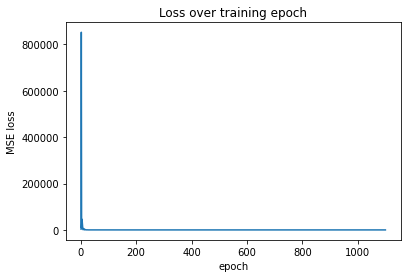

In [15]:
# Q7. Visualize (3)
# Plot the landscape of your training loss (MSE loss) saved for every epoch.
# y-axis would mean MSE loss and x-axis would mean the epoch of your training.
# Hint: you should plot (1,first MSE loss), ... ,(last epoch number,last MSE loss)
import matplotlib.pyplot as plt
x = [i for i in range(1, len(train_loss_1st)+1)]

plt.title("Loss over training epoch")
plt.xlabel("epoch")
plt.ylabel("MSE loss")
plt.plot(x, train_loss_1st)
plt.show()

In [18]:
# Q8. Prediction (2)
# Let's use the model on a new number x, defined as a tensor
# Get the model's prediction for this new x
def test_model(test_num):
    test = torch.tensor([test_num], dtype=torch.float32)
    pred = model_top1(test).item()
    print(f'Model Prediction for x = {test_num} : {pred:.4f}\nerror :{((test_num**2 + 5*test_num) - pred):.4f}')

test_model(10)

Model Prediction for x = 10 : 149.9901
error :0.0099


In [19]:
# Make sure the output of your code cells support your answers below:

# Q9. Describe how the loss changed over time during training. (2)

# The training loss value decreased sharply, then rose slightly, and then continued to decrease again, showing a pattern of convergence.

# Q10. Is the prediction for x=10 close enough to the ideal value of 150? 

# Why do you think the prediction is or isn't close enough to the ideal value? (2)
# Yes, the prediction results was 150.0000, which is ideal value.

# Q11. What are the predictions for x=20 and x=100? Based on these predictions, 
# comment on whether the model has captured the relationship between the training inputs and outputs. (2)

test_model(20)
# Model Prediction for x = 20 : 369.2545
# error :130.7455
test_model(100)
# Model Prediction for x = 100 : 2140.8533
# error :8359.1467

# Since the range of training data is set between -10 and 10, 
# it was confirmed that good prediction results were not shown in the case of 20 and 100, which are far outside the range of training data.

test_model(6)
# Model Prediction for x = 6 : 66.0611
# error :-0.0611
test_model(-10)
# Model Prediction for x = -10 : 50.0000
# error :0.0000
test_model(3)
# Model Prediction for x = 3 : 23.6960
# error :0.3040

# However, It can be seen that values within the training data range almost completely predict. 
# Therefore, the relationship between the training input value and the output value seems to be well reflected.

# Q12. Apart from tweaking the number of epochs and the number of neuron units in the hidden layer, think
# of AT LEAST ONE more thing you would do to try to improve the model. You do NOT have to follow the 
# requirements nor to implement anything. (1)

# 1. More training data with a wider range, It is possible to train a model that can explain a wider range.
# 2. Using different type of layers, such as convolutional layers or recurrent layers
# 3. Different activation function, such as sigmoid or tanh functions. 

Model Prediction for x = 20 : 389.6318
error :110.3682
Model Prediction for x = 100 : 2324.2954
error :8175.7046
Model Prediction for x = 6 : 66.0282
error :-0.0282
Model Prediction for x = -10 : 50.0000
error :-0.0000
Model Prediction for x = 3 : 23.9839
error :0.0161
